## Importing the libraries

In [1]:
! pip install geopandas

     |████████████████████████████████| 1.0MB 5.8MB/s 
     |████████████████████████████████| 6.5MB 31.5MB/s 
     |████████████████████████████████| 14.8MB 312kB/s 


In [2]:
import pandas as pd
import plotly.express as px
import altair as alt
import plotly.graph_objects as go
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# conecting with Google Drive to read the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the data set into a dataframe
df = pd.read_csv("/content/drive/MyDrive/Datasets/globalterrorismdb_0718dist.csv", encoding = "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



In [5]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


##Preprocessing

In [7]:
# replace some columns names
df.rename(columns={'iyear': 'Year', 'imonth': 'Month', 'city': 'City', 'iday': 'Day', 'country_txt': 'Country', 'region_txt': 'Region', 'attacktype1_txt': 'AttackType', 'target1': 'Target', 'nkill': 'Killed', 'nwound': 'Wounded', 'summary': 'Summary', 'gname': 'Group', 'targtype1_txt': 'Target_type', 'weaptype1_txt': 'Weapon_type', 'motive': 'Motive'}, inplace=True)
df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,provstate,City,latitude,longitude,specificity,vicinity,location,Summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,AttackType,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,...,weapsubtype4,weapsubtype4_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
# create a new dataframe just with the most importante feature
df_main = df[['Year', 'Country', 'Region', 'City', 'latitude', 'longitude', 'AttackType', 'Target_type']]

In [9]:
df_main.head()

,Year,Country,Region,City,latitude,longitude,AttackType,Target_type
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property
1,1970,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic)
2,1970,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media
3,1970,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic)
4,1970,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic)


## Data visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



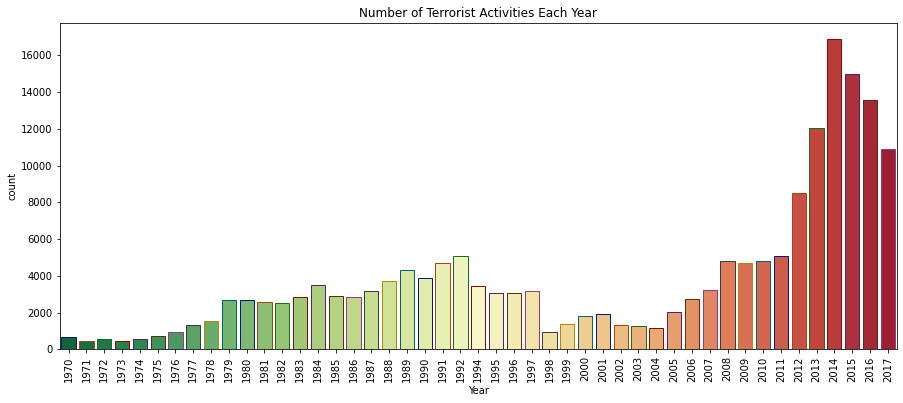

In [10]:
plt.subplots(figsize=(15, 6))
sns.countplot('Year',data=df_main, palette='RdYlGn_r', edgecolor=sns.color_palette('dark', 10))
plt.xticks(rotation=90)
plt.title('Number of Terrorist Activities Each Year')
plt.show()

### Interpretação
A intenção em plotar o gráfico acima é ter uma visão temporal da quantidade de eventos terrorístas ao longo dos anos cobertos por esse data set, com isso temos um leve crescimento dos casos entre os anos de 1970 e 1979, depois uma certa estabilidade no número de casos e até uma ligeira queda entre o final dos anos 90 até 2004, após isso de forma impressionante e elevado o número de casos, saindo de 2 mil casos chegando a 16 mil casos.

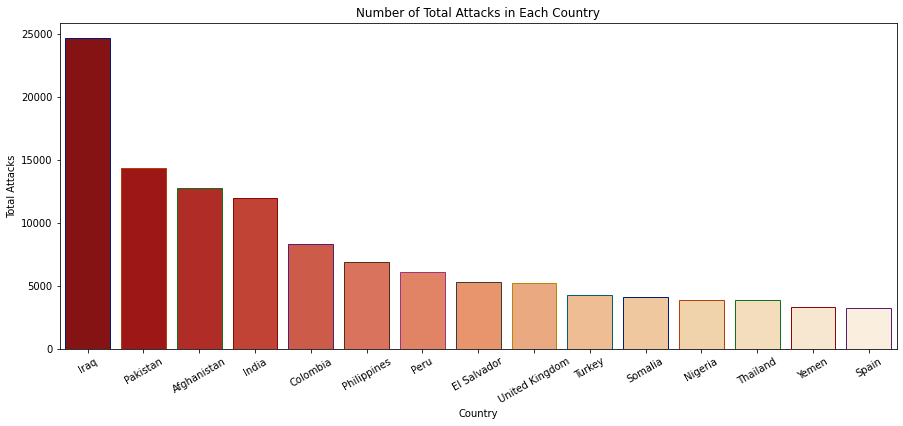

In [11]:
plt.subplots(figsize=(15, 6))
country_attacks = df.Country.value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'], palette= 'OrRd_r', edgecolor=sns.color_palette('dark', 10))
plt.xticks(rotation=30)
plt.title('Number of Total Attacks in Each Country')
plt.show()

### Interpretação
O objetivo com esse plot é destacar os países com mais ataques terroristcas, como já era esperado destacam-se paises do oriente médio e seu entorno como: Iraq, Pakistão e Afeganistão.

Text(0.5, 1.0, 'Total Attacks x AttackType')

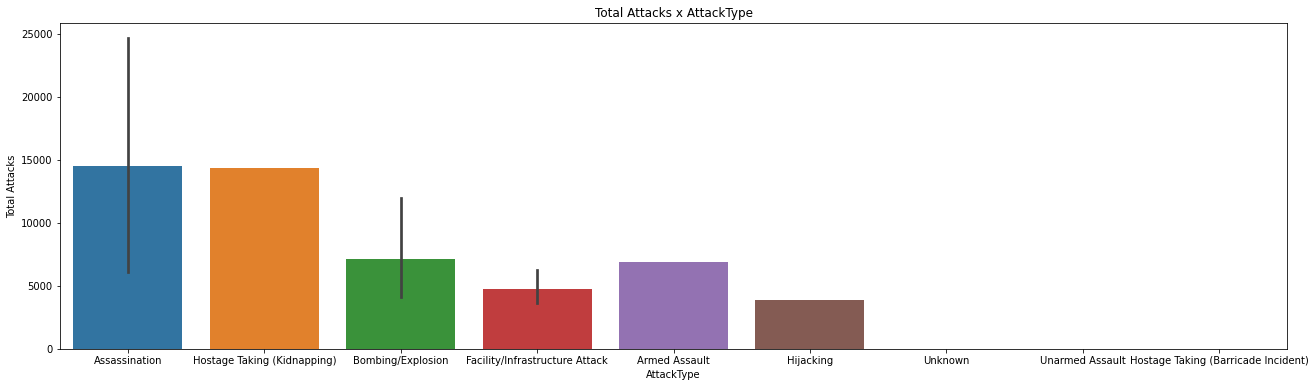

In [12]:
plt.figure(figsize= (22, 6))
sns.barplot(data=df_main, y=country_attacks['Total Attacks'], x='AttackType')
plt.title('Total Attacks x AttackType')

### Interpretação
Nesse plot o objetivo foi uma visualização dos tipos de ataques mais comuuns, nesse caso destaca-se dois tipos: Assasinato, tomar pessoas de refém e Explosão/Bombas.

Text(0.5, 1.0, 'Total Attacks x Target_type')

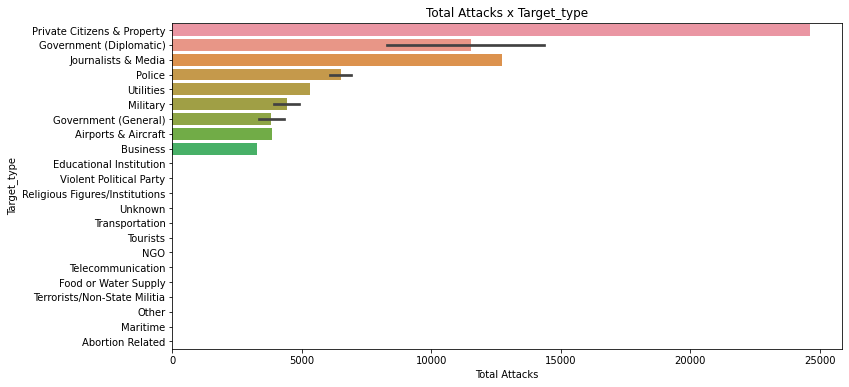

In [13]:
plt.figure(figsize= (12, 6))
sns.barplot(data=df_main, x=country_attacks['Total Attacks'], y='Target_type')
plt.title('Total Attacks x Target_type')

### Interpretação
O objetivo desse plot é avaliar os principais alvos dos ataques, considerando que a quantidade de tipos de ataques é consideravelment elevada, optei por plotar as features no eixo Y, para faciliar a visualização. Entre os principais alvos dos terroristas estão: Cidadão comuns e residências privadas e logo após diplomatas do Governo.

<Figure size 2160x1296 with 0 Axes>

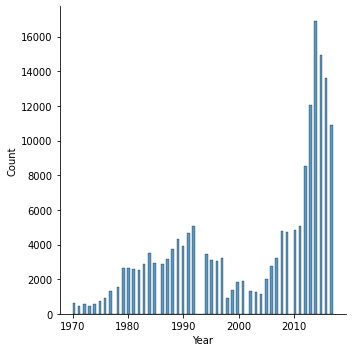

In [14]:
plt.figure(figsize= (30, 18))
sns.displot(df['Year'], bins=100)

### Interpretação
Esse plot tem o mesmo o objetivo do primeiro plot que seria uma análise temporal da quantidade de ataques no decorrer dos anos, apenas utilizei esse plot como uma versão diferente que ocuparia menos espaçao do meu relatório e traria a mesma informação.

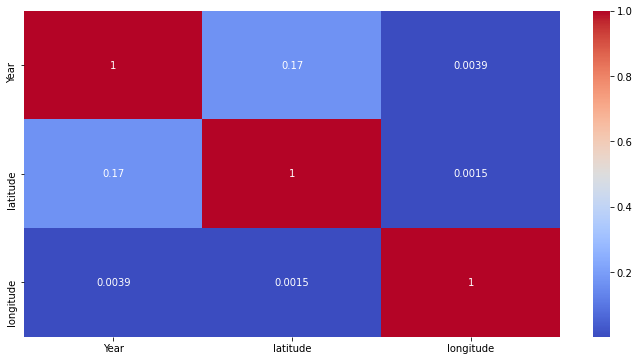

In [15]:
plt.figure(figsize= (12, 6))
sns.heatmap(df_main.corr(), cmap='coolwarm', annot=True)

### Interpretação
O objetivo desse mapa de calor seria identificar alta corelação entre as variáveis númericas, que nesse caso não tivemos.

In [16]:
fig = px.scatter_geo(df_main,
                     lat=df['latitude'],
                     lon=df['longitude'],
                     hover_name='Country')
fig.show()

### Interpretação
Através desse mapa podemos observar a distribuição dos eventos de terrorismo distribuidos pelo mundo, percebemos que em algumas regiões mais remotas do globo não temos ocorrência, como no interior da Australia, interior do Brasil, norte do Canadá e Leste da Rússia.

In [17]:
fig = px.density_mapbox(df_main, lat=df['latitude'], lon=df['longitude'], radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style='stamen-terrain')
fig.show()

### Interpretação
Esse mapa de densidade nos traz uma visualização similar a de cima, porém com maior detalhe de densidade entre as regiões, o que está com amarelo bem intenso temos maior número de casos de terrorismo, as regiões mais próximas do roxo tem baixo número de casos e as regiões na cor do mapa, cor verde não tem ocorrências.

In [18]:
fig = px.scatter_geo(df_main,
                     lat=df['latitude'],
                     lon=df['longitude'],
                     hover_name='AttackType',
                     color = 'Country')
fig.show()

### Interpretação
Plotei a mesma vista de cima porém separandos países por cores.

In [19]:
df_main['Country'].value_counts()

Iraq                24636
Pakistan            14368
Afghanistan         12731
India               11960
Colombia             8306
                    ...  
St. Lucia               1
Falkland Islands        1
International           1
North Korea             1
South Vietnam           1
Name: Country, Length: 205, dtype: int64

## Conclusão
DataViz é uma poderosa "ferramenta" de análise exploratória de base de dados, possibilitando identificar tendências, obter insights e conseguir contar uma história do dataset, compreendendo bem o comportamente de um determinado evento. Contudo é importante identificar os tipos mais indicados para plotar um determinando dataset, pois não existe o melhor gráfico em geral e sim plots indicados dependendo das suas features e do seu objetivo.

In [ ]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('TP_Data_Viz.ipynb')

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null